In [811]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [812]:
df = pd.read_csv("C:\\Users\\İdris Aydın\\Desktop\\covid19_case.csv")
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [813]:
countries_and_territories = df['countriesAndTerritories'].unique()
print("\nNumber of countries and territories where the research was conducted:", len(countries_and_territories),"\n")


Number of countries and territories where the research was conducted: 214 



In [816]:
continents = df['continentExp'].unique()

print("Continents in Research: (", len(continents), ") continents")
print("------------------------")
for c in continents:
    print(c)
print("------------------------\n")    

Continents in Research: ( 6 ) continents
------------------------
Asia
Europe
Africa
America
Oceania
Other
------------------------



In [817]:
print("COUNTRIES OR TERRITORIES WHERE HAVE BEEN NO DEATHS:", end=" ")

c = []

for country in df['countriesAndTerritories'].unique():
    if df[df['countriesAndTerritories'] == country]['deaths'].sum() == 0:
        c.append(country)
        
print(len(c), "countries or territories!\n")

rows = 5
cols = (len(c) + rows - 1)

for i in range(rows):
    row = c[i::rows]
    print("{:<30} {:<30} {:<30} {:<30}".format(*row))
print(c[len(c) - 1])    

COUNTRIES OR TERRITORIES WHERE HAVE BEEN NO DEATHS: 21 countries or territories!

Anguilla                       Falkland_Islands_(Malvinas)    Laos                           Saint_Vincent_and_the_Grenadines
Bhutan                         Faroe_Islands                  Marshall_Islands               Seychelles                    
Cambodia                       Greenland                      Mongolia                       Solomon_Islands               
Dominica                       Grenada                        New_Caledonia                  Timor_Leste                   
Eritrea                        Holy_See                       Saint_Kitts_and_Nevis          Vanuatu                       
Wallis_and_Futuna


In [885]:
totalDeaths = df.groupby('countriesAndTerritories')['deaths'].sum().reset_index()[['deaths']].sum().values
print("\nTOTAL NUMBER OF DEATHS IN THE WORLD:", totalDeaths)

totalCases = df.groupby('countriesAndTerritories')['cases'].sum().reset_index()[['cases']].sum().values
print("\nTOTAL NUMBER OF CASES IN THE WORLD:", totalCases,"\n")

death_ratio_inWorld = round(((df['deaths'].sum()) / (df['cases'].sum())) * 100, 2)
print("DEATH RATE IN THE WORLD:", death_ratio_inWorld)


TOTAL NUMBER OF DEATHS IN THE WORLD: [1612833]

TOTAL NUMBER OF CASES IN THE WORLD: [71503614] 

DEATH RATE IN THE WORLD: 2.26


In [886]:
d = df.groupby('continentExp')[['cases','deaths']].sum().reset_index()
ratios = []

for i in range(len(d)):
    ratios.append(str(round(((d.iloc[i]['deaths']) / (d.iloc[i]['cases'])) * 100, 2)))

print("\nTHE CONTINENT WITH THE MOST DEATH CASES:", d.loc[d['deaths'].idxmax()]['continentExp']) 
print("THE CONTINENT WITH THE LOWEST DEATH CASES:", d.loc[d['deaths'].idxmin()]['continentExp'],'\n') 

print("\n\n   TABLE OF DEATH RATIO OF CONTINENTS")
d['death ratio'] = ratios
d


THE CONTINENT WITH THE MOST DEATH CASES: America
THE CONTINENT WITH THE LOWEST DEATH CASES: Other 



   TABLE OF DEATH RATIO OF CONTINENTS


,continentExp,cases,deaths,death ratio
0,Africa,2379827,56334,2.37
1,America,30887593,785420,2.54
2,Asia,16782046,290129,1.73
3,Europe,21400012,479789,2.24
4,Oceania,53440,1154,2.16
5,Other,696,7,1.01


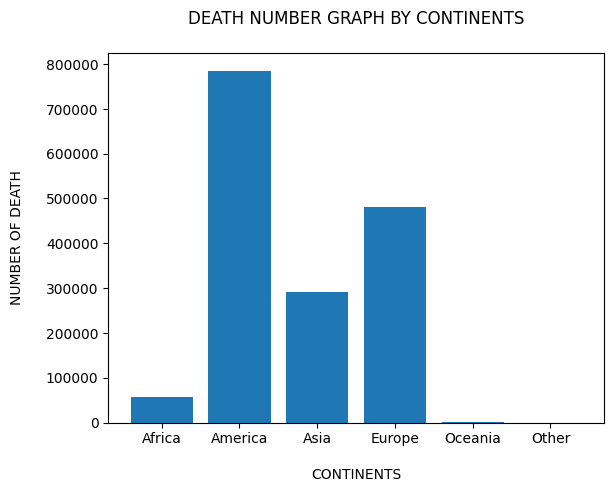

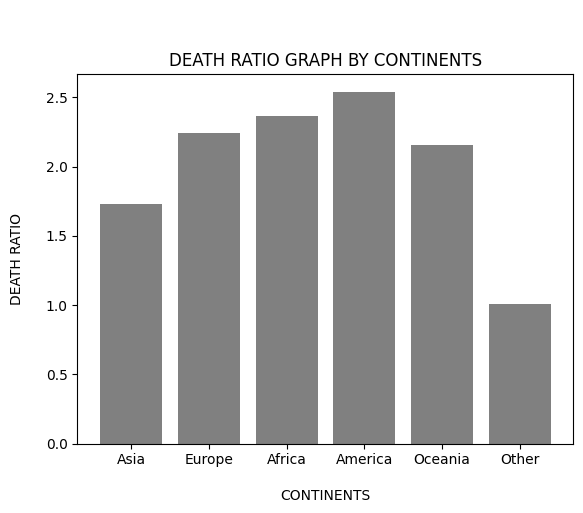

In [904]:
plt.bar(['Africa','America','Asia','Europe','Oceania','Other'], df.groupby('continentExp')['deaths'].sum())
plt.title("DEATH NUMBER GRAPH BY CONTINENTS\n")
plt.xlabel("\nCONTINENTS")
plt.ylabel("NUMBER OF DEATH\n")

plt.show()

deathRatios = []

for continent in df['continentExp'].unique():
    s = df[df['continentExp'] == continent]['deaths'].sum()
    ratio = (s / df[df['continentExp'] == continent]['cases'].sum()) * 100
    deathRatios.append(ratio)
    

plt.bar(df['continentExp'].unique() , deathRatios, color = 'gray')
plt.title("\n\nDEATH RATIO GRAPH BY CONTINENTS")
plt.xlabel("\nCONTINENTS")
plt.ylabel("DEATH RATIO\n")
plt.show()

# First chart shows us the total number of deaths across the continents in 2020.

# Second chart shows us the ratio of deaths across the continents in 2020.

# As can be seen from both graphs,the Covid-19 virus has shown its effect more in the America continent
# than in other continents.

In [839]:
d = df.groupby('countriesAndTerritories')[['cases', 'deaths']].sum().reset_index()

ratios = []

for i in range(len(d)):
    ratios.append(str(round(((d.iloc[i]['deaths']) / (d.iloc[i]['cases'])) * 100, 2)))

d['death ratio'] = ratios   

sorted_d = d.sort_values(by='death ratio').reset_index(drop = True)

print("\n10 COUNTRIES WITH THE HIGHEST DEATH RATE:")
print("----------------------------------------------")
for country in sorted_d.tail(10)['countriesAndTerritories']:
    print(country)
print("----------------------------------------------\n")

print("TABLE OF DEATH RATIO OF COUNTRIES AND TERRITORIES")

sorted_d


10 COUNTRIES WITH THE HIGHEST DEATH RATE:
----------------------------------------------
China
Syria
Egypt
Chad
Bolivia
Sudan
Isle_of_Man
Ecuador
Montserrat
Mexico
----------------------------------------------

TABLE OF DEATH RATIO OF COUNTRIES AND TERRITORIES


,countriesAndTerritories,cases,deaths,death ratio
0,Seychelles,187,0,0.0
1,Bhutan,438,0,0.0
2,Cambodia,359,0,0.0
3,Dominica,87,0,0.0
4,Eritrea,711,0,0.0
...,...,...,...,...
209,Sudan,21386,1347,6.3
210,Isle_of_Man,370,25,6.76
211,Ecuador,202110,13875,6.87
212,Montserrat,13,1,7.69


NUMBER OF DEATHS IN EACH QUARTER IN THE WORLD:

0 >> 38735 deaths
1 >> 463391 deaths
2 >> 506982 deaths
3 >> 603725 deaths


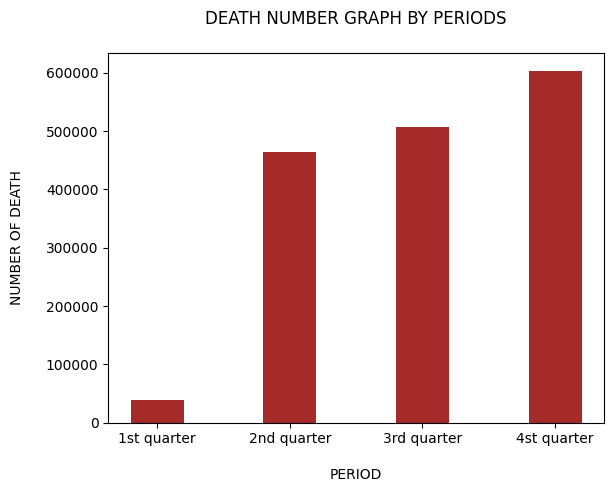

In [848]:
number_of_deaths = []

for i in range(1, 13, 3):
    deathNumber = df[((df['month'] >= i) & (df['month'] <= i + 2))]['deaths'].sum()
    number_of_deaths.append(deathNumber)    

print("NUMBER OF DEATHS IN EACH QUARTER IN THE WORLD:\n")
d = pd.Series(number_of_deaths, index = ['1st quarter', '2nd quarter', '3rd quarter', '4st quarter'])

for i in range(len(d)):
    print(i, ">>", d.iloc[i], "deaths")
    
    
plt.bar(['1st quarter', '2nd quarter', '3rd quarter', '4st quarter'], number_of_deaths, width = 0.4, color = 'brown')
plt.title("DEATH NUMBER GRAPH BY PERIODS\n")
plt.xlabel("\nPERIOD")
plt.ylabel("NUMBER OF DEATH\n")

plt.show()

# The Covid-19 virus has increased its impact in every quarter of 2020.

In [822]:
print("\nTHE COUNTRY WITH THE HIGHEST DEATHS OF ANY CONTINENT:\n")
for continent in df['continentExp'].unique():
    d = df[df['continentExp'] == continent].groupby('countriesAndTerritories')['deaths'].sum().sort_values(ascending=False)
    print(continent,'country with the most deaths:', d.index[0],"(", d.iloc[0], " deaths)")


THE COUNTRY WITH THE HIGHEST DEATHS OF ANY CONTINENT:

Asia country with the most deaths: India ( 143355  deaths)
Europe country with the most deaths: Italy ( 64520  deaths)
Africa country with the most deaths: South_Africa ( 23276  deaths)
America country with the most deaths: United_States_of_America ( 299177  deaths)
Oceania country with the most deaths: Australia ( 908  deaths)
Other country with the most deaths: Cases_on_an_international_conveyance_Japan ( 7  deaths)
